In [1]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Read the text (20 artists now)
path = 'data/english/'
filenames = os.listdir(path)
bio = []
for filename in filenames:
    true_path = path + filename
    f = open(true_path, 'r')
    text = f.read()
    name = filename.replace('.txt','')
    bio.append([name, text, len(text)])

In [3]:
df = pd.DataFrame(bio, columns = ['Artists', 'Text', 'Length'])
df.head()

,Artists,Text,Length
0,AGNOLO GADDI,How honourable and profitable it is to be exce...,13587
1,AGOSTINO AND AGNOLO,Among others who exercised themselves in the s...,19649
2,AMBROGIO LORENZETTI,"If that debt is great, as without doubt it is,...",5784
3,ANDREA DI CIONE ORCAGNA,Rarely is a man of parts excellent in one purs...,23300
4,ANDREA PISANO,The art of painting never flourished at any ti...,19171


In [4]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [5]:
# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Text'].apply(getSubjectivity)
df['Polarity'] = df['Text'].apply(getPolarity)
df.head()

,Artists,Text,Length,Subjectivity,Polarity
0,AGNOLO GADDI,How honourable and profitable it is to be exce...,13587,0.506488,0.245898
1,AGOSTINO AND AGNOLO,Among others who exercised themselves in the s...,19649,0.463258,0.229031
2,AMBROGIO LORENZETTI,"If that debt is great, as without doubt it is,...",5784,0.542810,0.299123
3,ANDREA DI CIONE ORCAGNA,Rarely is a man of parts excellent in one purs...,23300,0.469854,0.230769
4,ANDREA PISANO,The art of painting never flourished at any ti...,19171,0.520340,0.251124


In [6]:
# Sort by polarity in ascending order
df.sort_values(by = "Polarity", inplace = True, ascending = True)
df.head()

,Artists,Text,Length,Subjectivity,Polarity
11,GIOVANNI DAL PONTE,Although there is no truth and not much confid...,4586,0.524375,0.145906
12,MARGARITONE,Among the old painters who were much alarmed b...,9321,0.400544,0.165867
7,BUONAMICO BUFFALMACCO,"Buonamico di Cristofano, called Buffalmacco, p...",37367,0.490746,0.179362
10,GIOVANNI CIMABUE,By the infinite flood of evils which had laid ...,16990,0.447405,0.200638
13,NICCOLA AND GIOVANNI,Having discoursed of design and of painting in...,34004,0.476132,0.217505


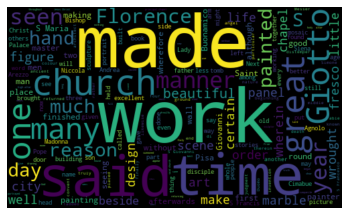

In [7]:
# A simple word cloud visualization for all artists
allWords = ' '.join([text for text in df['Text']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

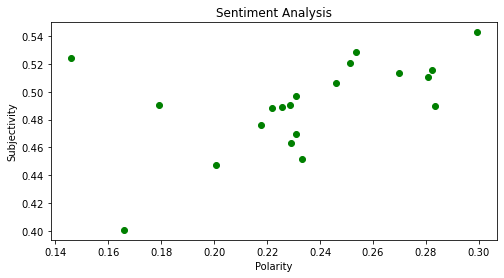

In [8]:
# Scatter plot of polarity and subjectivity
plt.figure(figsize = (8,4)) 
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color = 'Green')
     
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

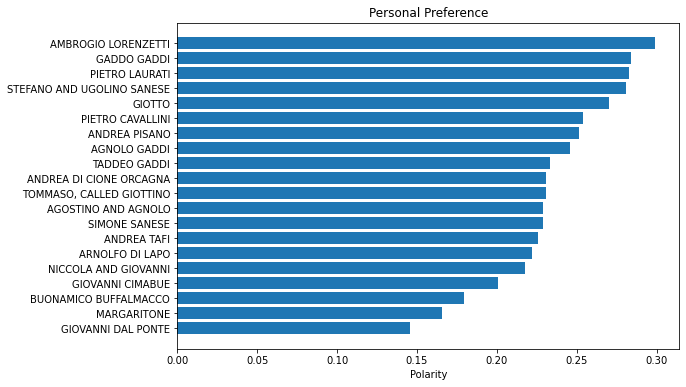

In [9]:
x = df["Artists"]
y = df["Polarity"]
plt.figure(figsize = (9,6)) 
plt.barh(x, y)

plt.xlabel('Polarity')
plt.title('Personal Preference')
plt.show()

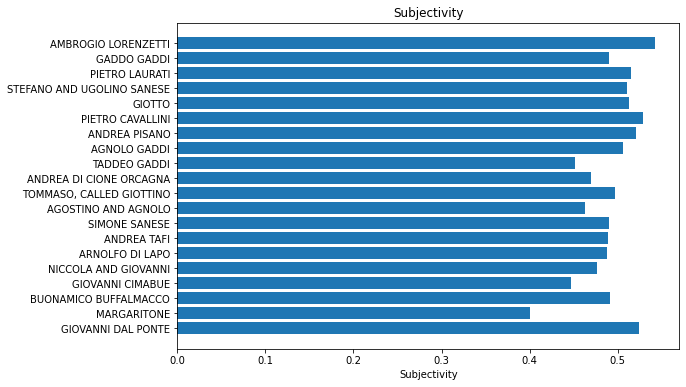

In [10]:
x = df["Artists"]
y = df["Subjectivity"]
plt.figure(figsize = (9,6)) 
plt.barh(x, y)

plt.xlabel('Subjectivity')
plt.title('Subjectivity')
plt.show()

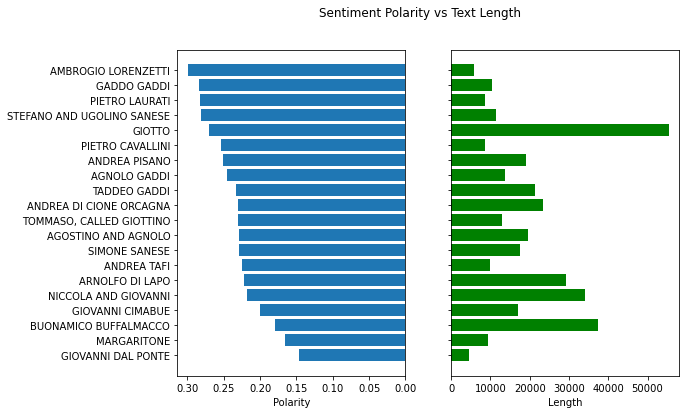

In [11]:
x = df["Artists"]
y1 = df["Polarity"]
y2 = df['Length']

fig, axes = plt.subplots(ncols = 2, sharey = True, figsize = (9,6))
axes[0].barh(x, y1, align = 'center')
axes[1].barh(x, y2, align = 'center', color = 'green')
axes[0].invert_xaxis()
axes[0].set_xlabel('Polarity')
axes[1].set_xlabel('Length')
plt.suptitle(t = 'Sentiment Polarity vs Text Length')
plt.show()